# Raw Data Exploration

## import the libraries 

In [1]:
# Declare variables
DATA_PATH = r"C:\Users\PC\DataCamp\Nautical_Boat_website\nautical_boat_website\data\raw\boat_data.csv"
DATA_LINK = "https://s3.amazonaws.com/talent-assets.datacamp.com/boat_data.csv"
COL_UNIQUE_COUNT = ["Boat Type","Manufacturer","Type","Material"]

In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
raw_df = pd.read_csv(DATA_LINK,encoding='utf-8')

## Raw data general infromation

In [11]:
# take a look into the data
raw_df.head(3).transpose()

,0,1,2
Price,CHF 3337,EUR 3490,CHF 3770
Boat Type,Motor Yacht,Center console boat,Sport Boat
Manufacturer,Rigiflex power boats,Terhi power boats,Marine power boats
Type,new boat from stock,new boat from stock,new boat from stock
Year Built,2017,2020,0
Length,4.0,4.0,3.69
Width,1.9,1.5,1.42
Material,NaN,Thermoplastic,Aluminium
Location,Switzerland Â» Lake Geneva Â» VÃ©senaz,Germany Â» BÃ¶nningstedt,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH
Number of views last 7 days,226,75,124


In [123]:
# the dataset shape
raw_df.shape

(9888, 10)

In [124]:
# Get the data type of each column
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 772.6+ KB


In [125]:
# Exam number of unique values in each column
for col in COL_UNIQUE_COUNT:
    print("Column name : ", col)
    print()
    print("Number of unique : ",raw_df[col].nunique())
    if raw_df[col].nunique() < 50 :
        print()
        print(raw_df[col].unique().tolist())
    print("-------------------------")
    print()

Column name :  Boat Type

Number of unique :  126
-------------------------

Column name :  Manufacturer

Number of unique :  910
-------------------------

Column name :  Type

Number of unique :  24

['new boat from stock', 'Used boat,Unleaded', 'Used boat', 'Used boat,Electric', 'new boat from stock,Unleaded', 'Used boat,Diesel', 'new boat on order', 'Unleaded', 'new boat on order,Unleaded', 'new boat from stock,Gas', 'Diesel', 'Display Model,Unleaded', 'Display Model', nan, 'Used boat,Gas', 'new boat from stock,Diesel', 'new boat from stock,Electric', 'new boat on order,Diesel', 'new boat from stock,Hybrid', 'Display Model,Diesel', 'Used boat,Hybrid', 'Display Model,Gas', 'Display Model,Electric', 'Electric', 'Used boat,Propane']
-------------------------

Column name :  Material

Number of unique :  11

[nan, 'Thermoplastic', 'Aluminium', 'GRP', 'PVC', 'Plastic', 'Wood', 'Steel', 'Hypalon', 'Carbon Fiber', 'Reinforced concrete', 'Rubber']
-------------------------



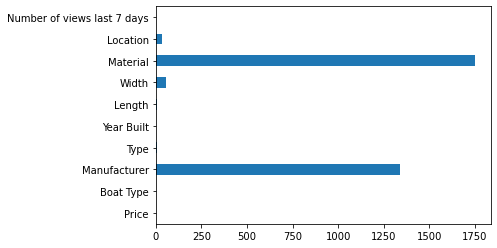

In [126]:
# Get number of missing values in each column
raw_df.isna().sum().plot(kind="barh");

# Explore each column

## Explore `TOP 10` Boat Type

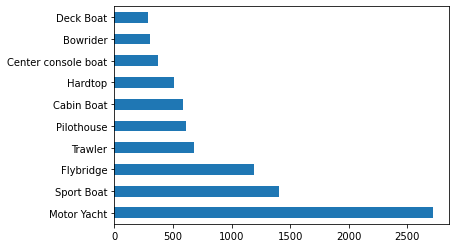

In [91]:
raw_df["Boat Type"].value_counts()[:10].plot(kind="barh");

## Explore `TOP 10` Manufacturers

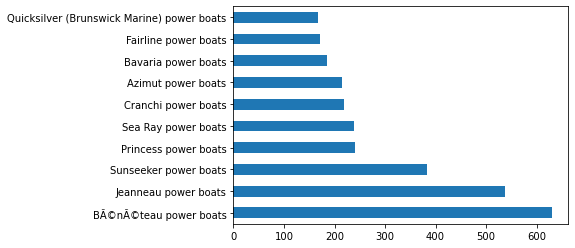

In [18]:
raw_df["Manufacturer"].value_counts()[:10].plot(kind="barh");

## Explore Type column

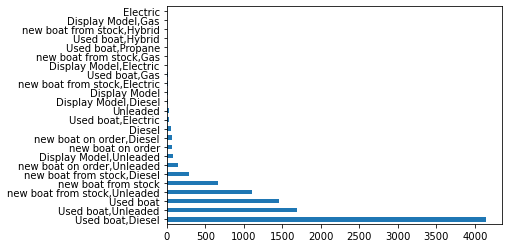

In [20]:
raw_df["Type"].value_counts().plot(kind="barh");

## Explore Year Built
we see that there are about 500 point with built in year 0

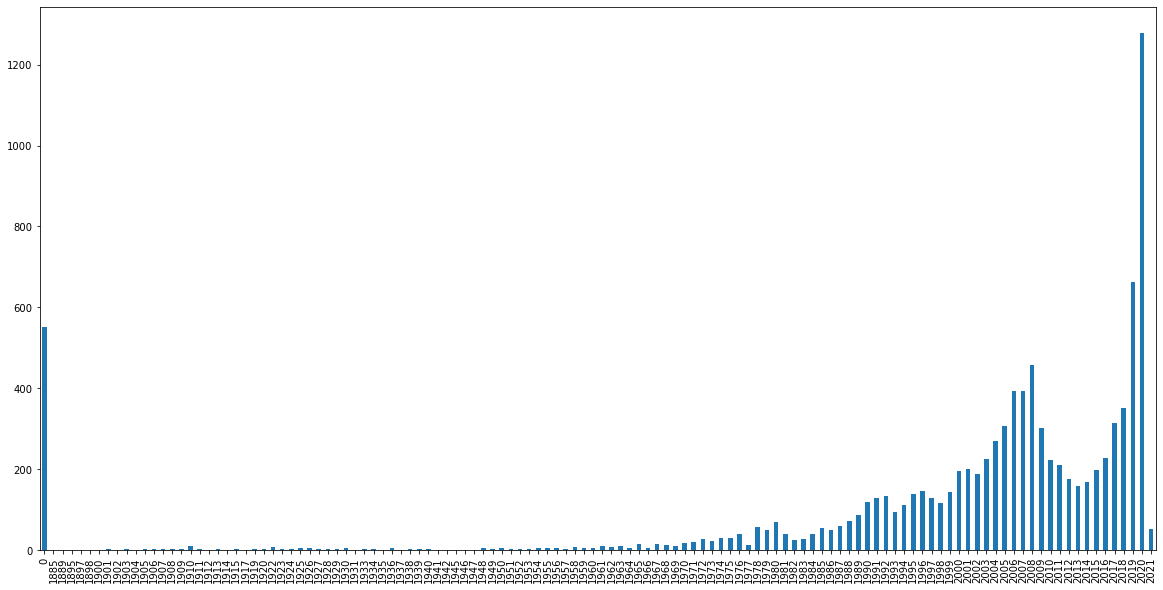

In [139]:
raw_df["Year Built"].value_counts().sort_index().plot(kind="bar",figsize=(20,10));

In [66]:
raw_df["Year Built"].describe()

count    9888.000000
mean     1893.192860
std       460.201582
min         0.000000
25%      1996.000000
50%      2007.000000
75%      2017.000000
max      2021.000000
Name: Year Built, dtype: float64

## Explore Length

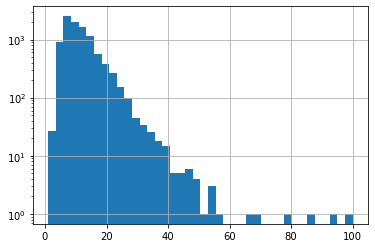

In [128]:
# See all data in a histogram, log scale
raw_df.Length.hist(bins=40,log=True);

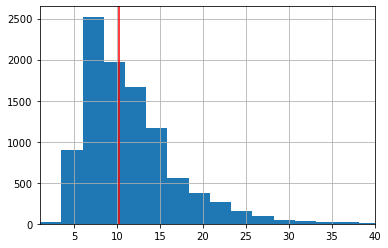

In [101]:
# Zoom in 40 meters and the median of all data
raw_df.Length.hist(bins=40)
plt.xlim(1,40)
plt.axvline(raw_df.Length.median(),c="r")

## Explore Width

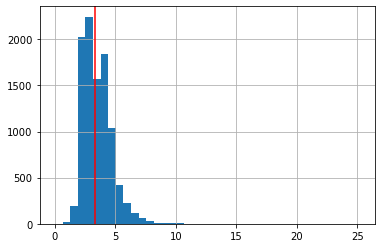

In [12]:
raw_df.Width.hist(bins=40)
#plt.xlim(1,40)
plt.axvline(raw_df.Width.median(),c="r")

## Explore Material

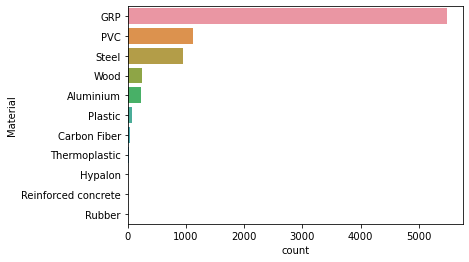

In [74]:
order = raw_df.Material.value_counts().index
sns.countplot(data=raw_df,y='Material',order=order);

## Explore Location

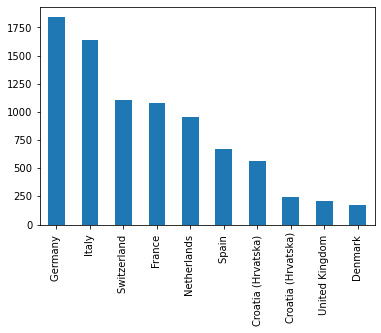

In [129]:
# Split the location column to country and location
raw_df[["country","location"]] = raw_df.Location.str.split("Â»",1,expand=True)

# Plot the top 10 countries
raw_df.country.value_counts()[:10].plot(kind="bar");

## Explore Number of views last 7 days

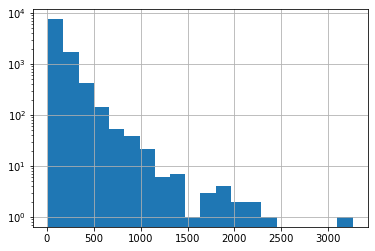

In [131]:
# Get the histogram in log scale
raw_df["Number of views last 7 days"].hist(bins=20,log=True,label="Number of views last 7 days");

## Explore Price

In [132]:
# Split the Price column to currency and price int
raw_df[["currency","price"]] = raw_df.Price.str.split(" ",expand=True)
raw_df[["currency","price"]].head()

,currency,price
0,CHF,3337
1,EUR,3490
2,CHF,3770
3,DKK,25900
4,EUR,3399


In [112]:
# Find the currency used in the website
raw_df.currency.unique()

array(['CHF', 'EUR', 'DKK', 'Â£'], dtype=object)

In [137]:
# Make the price uniform 
currency_conv = {'CHF':1.02, 'EUR':1, 'DKK':.13, 'Â£':1.18}
raw_df.price = raw_df.price.astype(int)
raw_df["price_eur"] = raw_df.apply(lambda x : currency_conv[x["currency"]] * x["price"], axis=1)
raw_df[["Price","price","price_eur"]].head()

,Price,price,price_eur
0,CHF 3337,3337,3403.74
1,EUR 3490,3490,3490.00
2,CHF 3770,3770,3845.40
3,DKK 25900,25900,3367.00
4,EUR 3399,3399,3399.00


<AxesSubplot:>

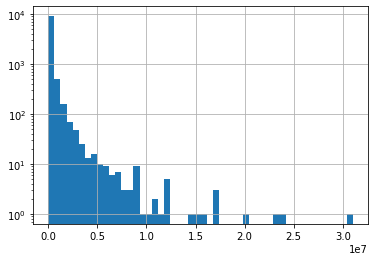

In [138]:
# Explore the distribution of prices on log scale
raw_df["price_eur"].hist(bins=50,log=True);

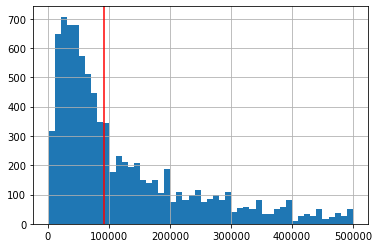

In [116]:
# Explore the distribution of prices between 1000$ to 500,000$ 
raw_df["price_eur"].hist(bins=50,range=(1000,500000))
plt.axvline(raw_df["price_eur"].median(),c="r")

## Problems
* Price has the currency. Convert from object to int and use consistant currency
* Location has a strange sample `Â»`.
* Material and Manfucturing have a lot of missing data.
* Year Built has 0 values, not null. Convert to datetime
* Type column can be split into condition and fuel
* Material and Type has a few unique values, so we can convert it to category

In [141]:
raw_df["Number of views last 7 days"].sum()

1474902